In [15]:
# importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from sklearn.decomposition import PCA
import plotly.express as px

In [16]:
# reading in the training data
df = pd.read_csv("data/train.csv")
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [17]:
# loading spacy model. Need to load the large model to get the vectors
nlp = spacy.load('en_core_web_lg')

In [18]:
# Disabling other pipes because we don't need them and it'll speed up this part a bit
# using .vector to get the vector for every excerpt in the training data
with nlp.disable_pipes():
    doc_vectors = np.array([nlp(sentance).vector for sentance in df['text']])

In [19]:
doc_vectors.shape

(19579, 300)

In [20]:
# list of indices for every author
eap_indices = list(np.where(df['author'] == 'EAP')[0])
hpl_indices = list(np.where(df['author'] == 'HPL')[0])
mws_indices = list(np.where(df['author'] == 'MWS')[0])

In [21]:
# using the indices found previously to seperate the doc_vectors array by author
eap = doc_vectors[eap_indices]
eap_mean = eap.mean(axis=0)
hpl = doc_vectors[hpl_indices]
hpl_mean = hpl.mean(axis=0)
mws = doc_vectors[mws_indices]
mws_mean = mws.mean(axis=0)
mws_mean.shape

(300,)

In [22]:
# defining the cosine similarity function
def cosine_similarity(a, b):
    return a.dot(b)/np.sqrt(a.dot(a) * b.dot(b))

In [23]:
print(cosine_similarity(eap_mean, mws_mean), cosine_similarity(eap_mean, hpl_mean), cosine_similarity(mws_mean, hpl_mean))

0.9957723 0.9961304 0.9954215


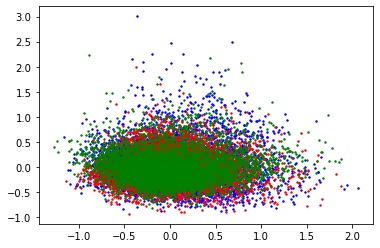

In [28]:
# using PCA to reduce the number of dimensions from 300 to 2
pca = PCA(n_components = 2)
principleComponents_eap = pca.fit_transform(eap)
principleComponents_mws = pca.fit_transform(mws)
principleComponents_hpl = pca.fit_transform(hpl)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(principleComponents_eap[:, 0], principleComponents_eap[:, 1], s = 2, c='b', label='EAP')
ax1.scatter(principleComponents_mws[:, 0], principleComponents_mws[:, 1], s = 2, c='r', label='MWS')
ax1.scatter(principleComponents_hpl[:, 0], principleComponents_hpl[:, 1], s = 2, c='g', label='HPL')

In [25]:
# using PCA to reduce the number of dimensions from 300 to 3
pca = PCA(n_components = 3)
principleComponents_eap = pca.fit_transform(eap)
principleComponents_mws = pca.fit_transform(mws)
principleComponents_hpl = pca.fit_transform(hpl)

df_1 = pd.DataFrame(principleComponents_eap, 
                   columns =['x','y','z'],
                   )
df_1['author'] = 'EAP'
df_2 = pd.DataFrame(principleComponents_mws, 
                   columns =['x','y','z'],
                   )
df_2['author'] = 'MWS'
df_3 = pd.DataFrame(principleComponents_hpl, 
                   columns =['x','y','z'],
                   )
df_3['author'] = 'HPL'

result = pd.concat([df_1, df_2, df_3], ignore_index = True)
result

,x,y,z,author
0,-0.062277,-0.268436,-0.141089,EAP
1,-0.301759,0.080668,0.172730,EAP
2,-0.095613,0.177819,-0.094587,EAP
3,-0.468477,0.436317,0.329554,EAP
4,0.308217,-0.128441,-0.150882,EAP
...,...,...,...,...
19574,0.193103,0.140562,-0.256607,HPL
19575,-0.353366,0.128970,-0.728994,HPL
19576,-0.234370,-0.095331,0.348158,HPL
19577,0.726377,0.070502,-0.637959,HPL


In [32]:
fig = px.scatter_3d(result, x = 'x', y = 'y', z = 'z', color = 'author')
fig.update_traces(marker=dict(size=5,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()